# Chap-1
- Chapter 1 measured whether or not an unknown population proportion was equal to some value. We used bootstrapping on the sample to estimate the standard error of the sample statistic. The standard error was then used to calculate a standardized test statistic, the z-score, which was used to get a p-value, so we could decide whether or not to reject the null hypothesis.

# Hypothesis Testing in Python

## Hypothesis testing Workflow
> steps in order from first to last.
1. Identify population parameters that is hypothesized about.
2. Specify the null and alternative hypothesis
3. Determine (standardized) test statistics and corresponding null distribution 
4. Conduct hypothesis test in Python
5. Measure evidence against the null hypothesis
6. Make a decesion comparing evidence to significance level
7. Interpret the results in the context of the orignal problem. 


- In 2013, Elronic Arts (EA) released Simcity5
- They wanted to increase pre-orders of the game
- They used A/B testing to test different advertising Scenarios
- This involes splitting users inyo control and treatment groups
- The control group saw the version with a banner advertising money off their next purchase with each pre-order. The treatment group saw the version without the banner. EA compared the percentage of checkout to see which performed best. 
- Our naive guess would be that the advertisement increased pre-order sales.

> Results:\
The treatment group  without the advertisement(no ad) resulted in 43 percent higher sales than the control group with the advert(With ad). 
The experiment proved that our intuition that more discount adverts would result in more sales was false
Was the result statistically significant or just random chance?

> Requirement:\
Need Orignal Dataset from EA, to determine this
However, the method to answering this question of significance would involve techniques from both the Sampling in Python course and from this course(Hypothesis Testing).

In [1]:
# 5. Stack Overflow Developer Survey 2020
# In this course, we'll look at a subset of the survey responses from users who identified as Data Scientists.
import pandas as pd

stack_overflow=pd.read_feather(r'C:\Users\navee\OneDrive\Desktop\Data_Camp\DataCamp_datasets\Hypothesis_Testing\stack_overflow.feather')
stack_overflow.head()


,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [2]:
# Hypothesis about the mean
# A hypothesis:
    # The mean annual compensation of the population of data scientist is $110,000

# The Point Estimate(Sample Statistics),The sample mean is a type of point estimate, which is another name for a
# summary statistic

mean_comp_samp = stack_overflow["converted_comp"].mean()
mean_comp_samp #The result is different from our hypothesis, but is it meaningfully different? (110000 & 119574.7174)

119574.71738168952

In [3]:
# Generating a bootstrap distribution
'''To answer this, we need to generate a bootstrap distribution of sample means. This is done by resampling the dataset,
calculating the sample mean for that resample, then repeating those steps to create a list of sample means.'''

import numpy as np
# Step 3. Repeat Steps ! & 2 many times,appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2. Calculate Point Estimate
    np.mean
        # Step 1. Resample
        (stack_overflow.sample(frac=1,replace = True)["converted_comp"]))


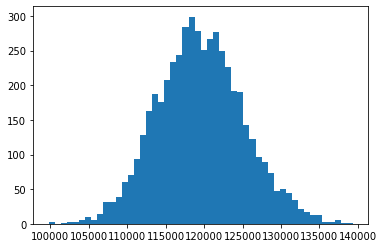

In [4]:
# Visualizing a bootstrap distribution
import matplotlib.pyplot as plt

plt.hist(so_boot_distn,bins=50)
plt.show()

# Its bell shape means that it's roughly normally distributed. 

In [5]:
# Standard Erroe
std_error = np.std(so_boot_distn, ddof=1)
std_error

# """Recall that the standard deviation of the sample statistics in the bootstrap distribution estimates the 
# standard error of the statistic"""

5630.819461173948

## Z-scores: 
- is a test statistic for a single variable.
- z-statistics needed when using one sample statistics to estimate a population parameter

> A common way of standardizing values is to subtract the mean, and divide by the standard deviation

- __standardized value = (value-mean) / std__

> For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter 
value, and divide by the standard error. The result is called a z-score.

- __z_score = (sample_statistic - hypothesized_parameter_value) / standard_error # Result is called Z_score__

> __The z-scores are a type of standardized test statistic.__

In [6]:
# Z-Score
mean_comp_samp = stack_overflow["converted_comp"].mean()

mean_comp_hyp = 110000 

std_error = np.std(so_boot_distn, ddof=1)
std_error

z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.7004127814272572

### Testing the hytpothesis
- Is 1.717 a high or low number?
- This is the goal of rhe course!

### Hypothesis Testing Usecase
> Determine whether sample statisticsare close to or far away from expected (or "hypothesized" Value)

### Standard normal (z) distribution
standard normal distribution: normal distribution with mean=0 + standard deviation=1 

In [7]:
# Practice Code
late_shipments =pd.read_feather(r'C:\Users\navee\OneDrive\Desktop\Data_Camp\DataCamp_datasets\Hypothesis_Testing\late_shipments.feather')
late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,...,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


In [8]:
late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [9]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments["late"] == "Yes") .mean()

# Print the results
print(late_prop_samp)

0.061


In [10]:
late_shipments["late"].value_counts()

No     939
Yes     61
Name: late, dtype: int64

In [11]:
encode_late = {"No":0,"Yes":1}
late_shipments["late"] = late_shipments["late"].replace(encode_late)

In [12]:
late_shipments["late"].value_counts()

0    939
1     61
Name: late, dtype: int64

In [13]:
import numpy as np

late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(np.mean(late_shipments.sample(frac=1,replace = True)["late"]))

In [14]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

# The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

0.13235096835501278


# p-values 
- Hypothesis tests are like criminal trials.

### Criminal trials

- Two Possible true states
    1. Defendent commited the crime
    2. Defendent did not commit the crime

- Two Possible verdicts/outcomes
    1. Guilty
    2. Not Guilty

- Initially the defendent is assumed to be not guilty
- prosecution team must present evidence "beyond a reasonable doubt" that the defendant committed the crime for a guilty verdict to be given.

#### Age of first programming experience
- The age_first_code_cut variable classifies when Stack Overflow user first starting programming. \
    - "adult":  If they started at 14 or older
    - "child":  means they started before 14
- Previous research: suggests that 35 percent of software developers programmed as children.
- Evidence that a greater proportion of data scientist start programming as childern


#### Definitions

- A hypothesis is a statement about an unknown population parameter.We don't know the true value of this population parameter; we can only make inferences about it from the data

- Hypothesis tests compare two competing hypotheses.
    - The null hypothesis(H0), representing the existing idea.
    - Alternative hypothesis(HA), representing a new idea that challenges the existing one.

> For Our Problem (Above Mentioned):\
H0: The proportion of data scientists that started programming as children is 35%. \
HA: The proportion of data scientists that started programming as childern is greater than 35%.

#### Criminal trials vs. hypothesis testing
- Either H0 or HA is true (not both)
- Initially, H0 is assumed to be true
- the test ends in either __"reject H0"__ or __"fail to reject H0"__
- Significance level is __"beyond a reasonable doubt"__ for hypothesis testing

### One-tailed and two-tailed tests
- The tails of a distribution are the left and right edges of its PDF
- Hypothesis tests check if the sample statistics lie in the tails of the __null distribution__
- There are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use
    - __two-tailed : Alternative different("differences between") from null ( we look for extreme values in either tail and perform a two-tailed test.)__
    - __right-tailed : Alternative (greater/exceed/longer/more) than null__
    - __left- tailed : Alternative (less/fewer) than null__
    

### p-values
- p-values quatify the evidence for the null hypothesis or p-values measure the strength of support for the null hypothesis
- Large p-values, (Large support for H0), mean our statistic is producing a result that is likely not in a tail of our null distribution __(fail to reject null hypothesis)__
- Small p-values, (Strong evidence again H0), mean our statistic is producing a result likely in the tail of our null distribution __(reject null hypothesis)__
- "p-values" are probabilities, they are always between zero and one. (small means "close to zero")
- The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.


#### To calculate the p-value, we must first calculate the z-score. 

In [15]:
prop_child_samp = (stack_overflow["age_first_code_cut"] == "child").mean()
print(prop_child_samp)

prop_child_hyp = 0.35

0.39141972578505085


In [16]:
stack_overflow["age_first_code_cut"].value_counts()

adult    1376
child     885
Name: age_first_code_cut, dtype: int64

In [17]:
encode_code = {"child":0,"adult":1}
stack_overflow["age_first_code_cut"] = stack_overflow["age_first_code_cut"].replace(encode_code)

In [18]:
first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(np.mean(stack_overflow.sample(frac=1,replace = True)["age_first_code_cut"]))

In [19]:
# We get the standard error from the standard deviation of the bootstrap distribution, 
std_error = np.std(first_code_boot_distn,ddof=1)
print(std_error)

0.010163905257244825


In [20]:
# z-score is the difference between the proportions, divided by the standard error.
z_score = (prop_child_samp - prop_child_hyp) / std_error

#### Calculate P-value
__Left-tailed test --(use)-- norm.cdf()\
Right-tailed test --(use)-- 1- norm.cdf()__

In [21]:
from scipy.stats import norm
p_value = 1-norm.cdf(z_score,loc=0,scale=1)
print(p_value)

2.2989555750529966e-05


# Statistical significance

- What defines the cutoff point between a small p-value and a large one?
> The cutoff point is known as the significance level, and is denoted alpha\
The significance level of a hypothesis test (a) is the threshold point for __"beyond a resonable doubt"\
Common values of (a) __0.05__ is the most common choice, but __0.10 and 0.01__ are also popular

- The significance level gives us a decision process for which hypothesis to support.\
- If the p-value <= alpha, we reject the null hypothesis. Otherwise, we fail to reject it
- alpha (a) should be set/decide __prior__ to conducting the hypothesis test,  Otherwise, there is a temptation to decide on a significance level that lets us choose the hypothesis we want.

In [22]:
alpha = 0.05
p_value <= alpha

True

### Making a Decision
__Decision : Reject H0 in favor of HA, We have strong evidence for the alternative hypothesis that the proportion of data scientists that started programming as children is greater than 35 percent.__

## Confidence intervals
- For a significance level of alpha (a), it's common to choose a confidence interval level 1-(a) \
> __Ex:__ For a significance level of 0.05 or 5%, we'd use a 95% confidence interval. The interval provides a range of plausible values for the population proportion of data scientists that programmed as children.


When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

In [23]:
lower = np.quantile(first_code_boot_distn,0.025)
upper = np.quantile(first_code_boot_distn,0.975)
print((lower,upper))

(0.5886775762936753, 0.6280406899601946)


## Type of Errors
__> For hypothesis testing, there are two ways to get it right, and two types of error.__\
If we support the alternative hypothesis when the null hypothesis was correct, we made a __false positive error.__ \
If we support the null hypothesis when the alternative hypothesis was correct, we made a __false negative error.__ \
These errors are sometimes known as __type one and type two errors,__ respectively.

### Possible Errors in Our Example
> __if p_value <= alpha, as we reject null hypothesis(H0)\
if p_value > alpha, we fail to reject null hypothesis(HA)__
- A __false positive (Type-1)error__: Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population.
- Conversely, if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a __false negative (Type-2) error__-.

# Chap-2
## Performing t-tests
- Comparing sample statistics across groups of a variable
- When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. 
-  t-statistics needed when using multiple sample statistics to estimate a population parameter

### Two-Sample Problems
- In the Stack Overflow dataset, converted_comp is a numerical variable of annual compensation.
- age_first_code_cut is a categorical variable with two levels: child and adult, 
> We can ask questions about differences in compensation across the two age groups, such as, are users who first programmed as a child better compensated than those that started as adults?

### Hypothesis:
> __Null Hypothesis (H0):__ The population mean for the two groups is the same\
    - __Ex:__ The mean compensation (in USD) is __the same__ for those that coded first as a child and those that coded first as an adult\
    - __Equation H0: mue_child = mue_adult__\
    -  __Equation H0: mue_child - mue_adult = 0__ (Alternative way to write equation)\
- Mu represents an unknown population mean, and we use subscripts to denote which group the population mean belongs to.\
- An alternate way of writing the equations is to compare the differences in population means to zero\
- Zero here corresponds to our hypothesized value for the difference in means.

> __Alternative Hypothesis (HA) :__ The population mean for users who started coding as children is greater than 
for users who started coding as adults\
    - __Ex:__ The mean compensation (in USD) is __greater__ for those that coded first as a child compared to those that coded first as an adult\
    - __Equation HA: mue_child > mue_adult__\
    - __Equation HA: mue_child - mue_adult > 0__  (Alternative way to write equation)

### Calculating groupwise summary statistics

In [24]:
stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()

age_first_code_cut
0    132419.570621
1    111313.311047
Name: converted_comp, dtype: float64

### Test statistics
- Although we don't know the population mean, we estimate it using the sample mean.\
__x-bar is used to denote a sample mean.__
    - x-bar child:  sample mean compensation for coding first as a child \
    - x-bar adult:  sample mean compensation for coding first as an adult.
test statistics : x-bar child - x-bar adult
> __difference between these two sample means is the test statistic for the hypothesis test__

__t = (difference in sample_statistic - difference_in_population_parameter) / standard_error (Result is called t-test)__

__Example: t= (x-bar child - x-bar adult) - (mue_child - mue_adult) /  SE(x-bar child - x-bar adult)__

### Standard Error
__s__ is the standard deviation of the variable\
__n__ is the sample size (number of observation/rows in sample)
We calculate the standard deviation of the numeric variable for each group in the sample, and the number of observations in each group. Then enter those values into the equation and compute the result.

### Assuming the null hypothesis is true
- If we assume that the null hypothesis is true, there's a simplification we can make. The null hypothesis assumes that the population means are equal, and their difference is zero, so the population term in the numerator disappears


In [25]:
stack_overflow=pd.read_feather(r'C:\Users\navee\OneDrive\Desktop\Data_Camp\DataCamp_datasets\Hypothesis_Testing\stack_overflow.feather')
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


### Calculations assuming the null hypothesis is true

In [26]:
x_bar = stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()
print(x_bar)
s = stack_overflow.groupby("age_first_code_cut")["converted_comp"].std()
print(s)
n = stack_overflow.groupby("age_first_code_cut")["converted_comp"].count()
print(n)

xbar_adult = x_bar[0] 
xbar_child = x_bar[1]

s_adult = s[0]
s_child = s[1]

n_adult = n[0]
n_child = n[1]

print(xbar_adult)
print(xbar_child)
print(s_adult)
print(s_child)
print(n_adult)
print(n_child)

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64
age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64
age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64
111313.31104651163
132419.5706214689
271546.5217287417
255585.2401149758
1376
885


### Calculating the test statistics
- Assigning the values to six different variables, the numerator is a subtraction of the sample means, and the denominator is like a weighted hypotenuse

In [27]:
numerator = xbar_child - xbar_adult
denominator = np.sqrt((s_child ** 2 / n_child) + (s_adult ** 2/ n_adult))
t_stat = numerator / denominator
t_stat

1.8699313316221844

### t-distribution
- The test statistic, t, follows a t-distribution. t-distributions have a parameter called the degrees of freedom, or df for short
- Using this approximation adds more uncertainty and that's why this is a t instead of a z problem. The t distribution allows for more uncertainty when using multiple estimates in a single statistic calculation

### Degree of freedom
- Notice that the t-distribution for small degrees of freedom has fatter tails than the normal distribution
- As we increase the degrees of freedom, the t-distribution gets closer to the normal distribution.In fact, a normal distribution is a t-distribution with infinite degrees of freedom. 
- Degrees of freedom are defined as the maximum number of logically independent values in the data sample. 

### Hypotheses
__H0:__ The mean compensation (in USD) is __the same__ for those that coded first as a child and those that coded first as an adult\
__HA:__ The mean compensation (in USD) is __greater__ for those that coded first as a child compared to those that coded first as an adult\
__Result:__ Since this is a "greater than" alternative hypothesis, we need a __right-tailed test (1- t.cdf),__.

>__Q: In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?\
Ans: When a sample standard deviation is used in estimating a standard error.\
> Result:  Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.__

In [28]:
degree_of_freedom = n_child + n_adult -2
degree_of_freedom

2259

### Calculating p-values: two means from different groups
- use t-distribution CDF not normal cdf

In [29]:
## right tail test (1-t.cdf)

from scipy.stats import t
P_Value= 1- t.cdf(t_stat, df = degree_of_freedom) 
P_Value

0.030811302165157595

#### Decesion Making
This p-value is less than the significance level of point-one, so we should reject the null hypothesis in favor of the alternative hypothesis that Stack Overflow data scientists who started coding as children earn more.

## Paired t-tests

In [30]:
sample_data = pd.read_feather(r'C:\Users\navee\OneDrive\Desktop\Data_Camp\DataCamp_datasets\Hypothesis_Testing\repub_votes_potus_08_12.feather')
sample_data.head()


,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


# Hypotheses
Question: Was the percentage of Republican candidate votes __lower__ in 2008 than 2012.\
__Equation H0: mue_2008 - mue_2012 = 0\
Equation HA: mue_2008 - mue_2012 < 0
Set (a) = 0.05 significant level__
> __Data is paired__ each votes percentage refers to the __same country__
    - Want to capture votting patterns in model 

In [31]:
# From two sample to one
sample_data["diff"] =  sample_data["repub_percent_08"] - sample_data["repub_percent_12"]
sample_data

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


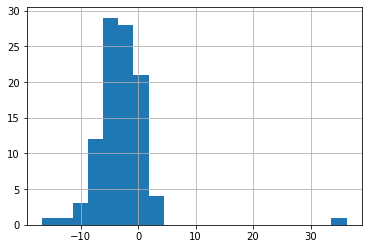

In [32]:
import matplotlib.pyplot as plt
sample_data["diff"].hist(bins=20)
plt.show()

In [33]:
# Calculate the sample statistics of the difference
xbar_diff = sample_data["diff"].mean()
xbar_diff

-2.8771090412429454

### Revised Hypotheses

### Old Hypotheses
__Equation H0: mue_2008 - mue_2012 = 0\
Equation HA: mue_2008 - mue_2012 < 0__

### New Hypotheses
__Equation H0: mue_diff = 0\
Equation HA: mue_diff < 0__

### t-stats
__Example: t= (xbar_diff - mue_diff)  / s_diff **2 / n_diff)__

### Degree of freedom
__df = n_diff -1__

## Calculate the p-value

In [34]:
n_diff = len(sample_data)
print(n_diff)

s_diff = sample_data["diff"].std()
print(n_diff)

# Assuming the null hypothesis is true means mu-diff is zero.

t_stat = (xbar_diff - 0)/ np.sqrt(s_diff **2/n_diff)
print(t_stat)

degrees_of_freedom = n_diff -1
print(degrees_of_freedom)

100
100
-5.601043121928492
99


In [35]:
## left tail test (t.cdf)

from scipy.stats import t
p_value= t.cdf(t_stat, df = degrees_of_freedom) 
p_value

9.572537285272304e-08

### Decision Making

The p-value is really small at around nine-point-six times ten to the minus eight. That means we reject the null hypothesis in favor of the alternative hypothesis that the Republican candidates got a smaller percentage of the vote in 2008 compared to 2012.

## Testing differences between two means using ttest()

In [36]:
import pingouin as pg
pg.ttest(x=sample_data["diff"],y=0,alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


In [37]:
paired = pg.ttest(x=sample_data["repub_percent_08"],y=sample_data["repub_percent_12"],paired=True,alternative="less")
unpaired = pg.ttest(x=sample_data["repub_percent_08"],y=sample_data["repub_percent_12"],paired=False,alternative="less")
unpaired

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


The test statistic is closer to zero, there are more degrees of freedom, and the p-value is much larger.

### Paired vs Unpaired: 
- how to compare two groups in the unpaired and paired cases
- Performing an unpaired t-test when our data is paired increases the chances of false negative errors.
- When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.\
- The p-value from the unpaired test is greater than than the p-value from the paired test.

## ANOVA tests : 
> __ANOVA extends t-tests to more than two groups, \
A test for differences between groups__

In [38]:
import pandas as pd
stack_overflow = pd.read_feather(r'C:\Users\navee\OneDrive\Desktop\Data_Camp\DataCamp_datasets\Hypothesis_Testing\stack_overflow.feather')
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [39]:
stack_overflow["job_sat"].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

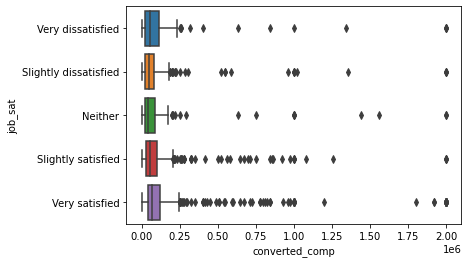

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="converted_comp",y = "job_sat",data=stack_overflow)
plt.show()

In [41]:
# ## Analysis of variance (ANOVA)
# ANOVA tests determine whether there are differences between the groups.
# We begin by setting our significance level to point-two. This value is larger than in many situations but will
# help us understand the implications on comparing different numbers of groups later on

import pingouin as pg
import numpy as np
anova = pg.anova(data=stack_overflow,dv="converted_comp",between="job_sat")
print(anova)

# We specify the data as stack_overflow, the dependent variable, dv, as converted_comp, and the column of groups to 
# calculate between as job_sat. The p-value is stored in the p-unc column, which is point-zero-zero-one-three,
# which is smaller than alpha at 20 percent. That means that at least two of the categories of job satisfaction have 
# significant differences between their compensation levels, but this doesn't tell us which two categories they are.

0.001315 < 0.20 # alpha(a)


    Source  ddof1  ddof2         F     p-unc       np2
0  job_sat      4   2256  4.480485  0.001315  0.007882


True

In [42]:
# ## Pairwise tests
# To identify which categories are different, we compare all five job satisfaction categories, testing on each pair
# in turn. There are ten ways of choosing two items from a set of five, so we have ten tests to perform. 
# Our significance level is still point-two.

pg.pairwise_tests(data=stack_overflow, dv="converted_comp",between="job_sat", padjust = "none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


- As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically.
- The more tests we run, the higher the chance that at least one of them will give a false positive significant result. 
- With a significance level of point-two, if we run one test, the chance of a false positive result is point-two. 
- With five groups and ten tests, the probability of at least one false positive is around point-seven. 
- With twenty groups, it's almost guaranteed that we'll get at least one false positive.



### Bonferroni correction
> The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a 
false positive. One common adjustment is the Bonferroni correction. Looking at the p-corr column corresponding 
to corrected p-values, as opposed to the p-unc column for uncorrected, only two of the pairs appear to have 
significant differences.(less than 0.20)

In [43]:
pg.pairwise_tests(data=stack_overflow, dv="converted_comp",between="job_sat", padjust = "bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


### More methods
> padjust : string \
Methods used for testing and adjusting of p-values.\
In almost all pairwise t-testing situations choosing a correction method is more appropriate.


- "none" : no correction[default]
- "bonf" : one-step Bonferoni correction
- "sidak" : one-step Sidak correction
- "holm" : step-down method using Bonferoni adjustments
- "fdr_bh" : Benjanmini/Hochberg FDR Correction
- "fdr_by" : Benjanmini/Yekutieli FDR Correction





# Chap-3
## One-sample proportion tests

### Standaized test statistics for proportion
- A bootstrap distribution can be computationally intensive to calculate, Now Calculate the test-statistics without using bootstrap distribution
- An (unknown population parameter) that is a proportion, or (population proportion) for short, is __denoted p.(p)__
- The sample proportion is __denoted p-hat (p^)__
- hypothesized value for the population proportion is __denoted p-zero. (p0)__
- The test statistic for proportion(s) has only one estimate of a parameter instead of two.

### why we used a z-distribution instead of t?
- s is calculated from x-bar
- x-bar estimates population mean
- s estimates population standard deviation


Since t-distributions are effectively a normal distribution with fatter tails, we can use them to account for this extra uncertainty. In effect, the t-distribution provides extra caution against mistakenly rejecting the null hypothesis. __For proportions, we only use p-hat in the numerator, thus avoiding the problem with uncertainty, and a z-distribution is fine__

### Stack Overflow age caregories
H0: Propoprtion of Stack Overflow users age under thirty = 0.5\
HA: Propoprtion of Stack Overflow users age under thirty != 0.5


In [44]:
alpha = 0.1
stack_overflow["age_cat"].value_counts(normalize=True)

Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

In [45]:
## Variable for Z-Score

#  sample proportion
p_hat = (stack_overflow["age_cat"] == "Under 30").mean()
print(p_hat)

# hypothesized value
p0 = 0.5 # according to null hypothesis

n = len(stack_overflow)
print(n)

0.5356037151702786
2261


In [46]:
numerator = p_hat - p0
denominator = np.sqrt(p0 * (1- p0) / n)
z_score = numerator / denominator
z_score

3.385911440783663

In [47]:
### Calculating P-Value
from scipy.stats import norm

# For left-tailed ("less than") alternative hypotheses, we transform the z-score into a p-value using norm-dot-cdf.
left_pvalue = norm.cdf(z_score)
print(left_pvalue)

# For right-tailed ("greater than") alternative hypotheses, we subtract the norm-dot-cdf result from one.
right_pvalue = 1- norm.cdf(z_score)
print(right_pvalue)


# For two-tailed ("not equal") alternative hypotheses, we check whether the test statistic lies in either tail,
# so the p-value is the sum of these two values: one corresponding to the z-score and the other to its negative on 
# theother side of the distribution.
ts_pvalue = norm.cdf(z_score) + 1- norm.cdf(z_score)
print(ts_pvalue)


# Since the normal distribution PDF is symmetric, this simplifies to twice the right-tailed p-value since the 
# z-score is positive.
p_value = 2 * (1- norm.cdf(z_score))
print(p_value)

print(p_value <= alpha)

0.999645288631595
0.00035471136840503625
1.0
0.0007094227368100725
True


#### Decision Making
> Here, the p-value is less than the significance level of point-zero-one, so we reject the null hypothesis, 
concluding that the proportion of users under thirty is not  equal to point-five.

## Two-sample proportion tests
- test for differences between proportions in two populations.

#### Comparing two caregories
- H0: Proportion for hobbyist user is the same for those under thirty as those at least thirty \
    - H0: p>=30 - p<30 = 0
- HA: Proportion for hobbyist user is different for those under thirty to those at least thirty 
    - HA: p>=30 - p<30 != 0

In [48]:
alpha = 0.05 

In [49]:
## Getting the number for the z-score
p_hats = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize=True)
print(p_hats)
n = stack_overflow.groupby("age_cat")["hobbyist"].count()
print(n)


p_hat_atleast_30 = p_hats[("At least 30","Yes")]
p_hat_under_30 = p_hats[("Under 30","Yes")]
print(p_hat_atleast_30,p_hat_under_30)# This returns a sample proportion of point-77 for the at least thirty group, 
# and point-84 for the under thirty's.



n_atleast_30 = n["At least 30"]
n_under_30 = n["Under 30"]
print(n_atleast_30,n_under_30)# There are 1050 rows in the at least thirty group and 1211 for the under 30 group.

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64
age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64
0.7733333333333333 0.8431048720066061
1050 1211


In [50]:
# Calculate the pooled estimate of the population proportion
p_hat = (n_atleast_30 * p_hat_atleast_30 + n_under_30 * p_hat_under_30)/ (n_atleast_30 + n_under_30)

std_error = np.sqrt(p_hat * (1-p_hat) / n_atleast_30 + p_hat * (1-p_hat) / n_under_30)
z_score = (p_hat_atleast_30 - p_hat_under_30) / std_error
print(z_score)

-4.223691463320559


In [51]:
stack_overflow.groupby("age_cat")["hobbyist"].value_counts()


age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

###  Proportion tests using proportions_ztest()

In [52]:

n_hibbyist = np.array([812,1021])
n_rows = np.array([812+238,1021+190])

from statsmodels.stats.proportion import proportions_ztest

z_score, p_value = proportions_ztest(count = n_hibbyist, nobs = n_rows, alternative = "two-sided" )
print("z_score :",z_score,"p_value :",p_value)


z_score : -4.223691463320559 p_value : 2.403330142685068e-05


### Decision Making
- The p-value is smaller than the five percent significance level we specified, so we can conclude that there is a difference in the proportion of hobbyists between the two age groups.

# Practice Code

In [53]:

late_shipments =pd.read_feather(r'C:\Users\navee\OneDrive\Desktop\Data_Camp\DataCamp_datasets\Hypothesis_Testing\late_shipments.feather')
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [54]:
p_hats = late_shipments.groupby("freight_cost_groups")["late"].value_counts(normalize=True)

# p_hats= p_hats[("expensive","Yes")],p_hats[("reasonable","Yes")]
print(p_hats)


ns = late_shipments.groupby("freight_cost_groups")["late"].count()
print(ns)

# p_hat_atleast_30 = p_hats[("At least 30","Yes")]
# p_hat_under_30 = p_hats[("Under 30","Yes")]

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: late, dtype: float64
freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64


In [55]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Print the result
print("p_hat :",p_hat[1]) #Yes

# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)
print("standard_error : ",std_error[1])

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error


# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print z_score & p_value
print("z_score :",z_score[1],"p_value : ",p_value[1]) #Ans not matched

p_hat : 0.058823529411764705
standard_error :  0.015031300895066685
z_score : 2.922648567784529 p_value :  0.0017353400023595311


In [56]:

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([500+45, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count = success_counts, nobs = n, alternative = "larger" )

# Print the results
print(stat, p_value) #Answer Matched

3.1190401865206128 0.0009072060637051224


## Chi-square test of independence:
> __chi-square tests of independence extend proportion tests to more than two groups.__

> Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.\
The chi-square test statistic is a square number, so it is always non-negative, so only the right tail tends to be of interest.\
The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a chi-square test of independence.

### Independence Variable
> __Statistical Independence:__ Two categorical variables are consider statistically independent when the proportion of successes in the response variable is the same across all categories of the explanatory variable.

In [57]:
'''method returns three different pandas DataFrames: the expected counts, the observed counts, and statistics 
related to the test. '''

expected , observe , stats = pg.chi2_independence(data = stack_overflow, x= "hobbyist", y="age_cat",correction=False)
print(stats)

# The correction argument specifies whether or not to apply Yates' continuity correction, which is a fudge factor 
# for when the sample size is very small and the degrees of freedom is one. Since each group has over one hundred
# observations, we don't need it here.

'''The p-value is the same as we had with the z-test of around two in one hundred thousand. 
The chi2 value is the squared result of our z-score (z_score **2) seen in the previous video.'''

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


'The p-value is the same as we had with the z-test of around two in one hundred thousand. \nThe chi2 value is the squared result of our z-score (z_score **2) seen in the previous video.'

In [58]:
stack_overflow["age_cat"].value_counts()
stack_overflow["job_sat"].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

In [59]:
stack_overflow["age_cat"].value_counts()

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

### Declaring the Hypotheses
> __Here, age category is the response variable, and job satisfaction is the explanatory variable\
H0 : Age Categories are independent of job satisfaction levels (null hypothesis is that independence occurs)\
HA : Age Categories are not independent (associated) of job satisfaction levels\
alpha : 0.1\
test statistics denoted x2\
Assuming Independence(if independence was true),how far away are the observed results from the expected value__

- if p > significance value = Independent (Fails to Reject the null hypothesis)
- if p<= significance = associated (Reject the null hypothesis)

"If the age category was independent of job satisfaction, the split between the age categories would be at the same\nheight in each of the five bars. There's some variation here, but we'll need a chi-square independence test to \ndetermine whether it's a significant difference."

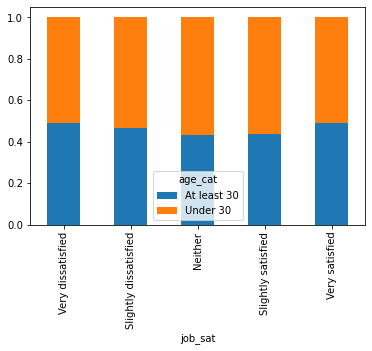

In [60]:
# Exploratory Visualization : Proportional Stack bar plot

# Proportion of age_cat grouped by job_sat
props = stack_overflow.groupby("job_sat")["age_cat"].value_counts(normalize = True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of job_sat vs. age_cat
wide_props.plot(kind="bar",stacked=True)

'''If the age category was independent of job satisfaction, the split between the age categories would be at the same
height in each of the five bars. There's some variation here, but we'll need a chi-square independence test to 
determine whether it's a significant difference.'''

In [61]:
expected , observe , stats = pg.chi2_independence(data = stack_overflow, x= "job_sat", y="age_cat",correction=False)
print(stats)

'''Degree of Freedom : (No of response categories -1) * (No of explanatory categories -1) --- (2-1) * (5-1) = 4         
    The p-value is point-two-three, which is above the significance level (0.10) we set,so we conclude that age categories are independent of job satisfaction.Fail to reject the null hypothesis and conclude that job_sat and age_cat are independent.'''


                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


'Degree of Freedom : (No of response categories -1) * (No of explanatory categories -1) --- (2-1) * (5-1) = 4         \n    The p-value is point-two-three, which is above the significance level (0.10) we set,so we conclude that age categories are independent of job satisfaction.Fail to reject the null hypothesis and conclude that job_sat and age_cat are independent.'

      test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  5.552373  4.0  0.235164  0.049555  0.437417


'If we run the chi-square test with the variables swapped, then the results are identical. Because of this, \nwe phrase our questions as "are variables X and Y independent?",    \nrather than "is variable X independent from variable Y?", since the order doesn\'t matter.'

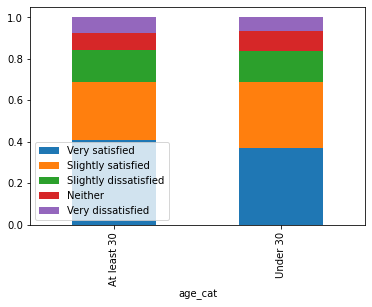

In [62]:
# Swapping the Variable?
props = stack_overflow.groupby("age_cat")["job_sat"].value_counts(normalize = True)
wide_props = props.unstack()
wide_props.plot(kind="bar",stacked=True)

# chi-square both ways

expected , observe , stats = pg.chi2_independence(data = stack_overflow, x="age_cat",y= "job_sat",correction=False)
print(stats[stats["test"]=="pearson"])
'''If we run the chi-square test with the variables swapped, then the results are identical. Because of this, 
we phrase our questions as "are variables X and Y independent?",    
rather than "is variable X independent from variable Y?", since the order doesn't matter.'''

In [63]:
# What about direction and tails?

'''We didn't worry about tails in this test, and in fact, the chi2_independence method doesn't have an alternative 
 argument. This is because the chi-square test statistic is based on the square of observed and expected counts,  
 and square numbers are non-negative. That means that chi-square tests tend to be right-tailed tests.
 Left-tailed chi-square tests are used in statistical forensics to detect if a fit is suspiciously good because 
 the data was fabricated. Chi-square tests of variance can be two-tailed. These are niche uses, though.'''

"We didn't worry about tails in this test, and in fact, the chi2_independence method doesn't have an alternative \n argument. This is because the chi-square test statistic is based on the square of observed and expected counts,  \n and square numbers are non-negative. That means that chi-square tests tend to be right-tailed tests.\n Left-tailed chi-square tests are used in statistical forensics to detect if a fit is suspiciously good because \n the data was fabricated. Chi-square tests of variance can be two-tailed. These are niche uses, though."

## Chi-square goodness of fit tests
> we'll use another variant of the chi-square test to compare a single categorical variable to a hypothesized distribution.\
The one-sample chi-square test is called a goodness of fit test, as we're testing how well our hypothesized data fits the observed data.\
The test to compare the proportions of a categorical variable to a hypothesized distribution is called a chi-square goodness of fit test.

> __The Stack Overflow survey contains a fun question__\
Question : __How users feel when they discover that they already visited the top resource?__

In [64]:
purple_link_counts = stack_overflow["purple_link"].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [65]:
purple_link_counts = purple_link_counts.rename_axis("purple_link").reset_index(name="n").sort_values("purple_link")
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [66]:
# Let's hypothesize that half of the users in the population would respond "Hello, old friend", and the other 
# three responses would get one sixth each. 

import pandas as pd
## Declaring the Hypotheses
hypothesized = pd.DataFrame({"purple_link" : ["Amused", "Annoyed","Hello, old friend", "Indifferent"],
              "prop" : [1/6, 1/6, 1/2, 1/6]
              })
hypothesized



,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


### Declearing the Hypothesis 
__H0 : The sample matches the hypothesized distribution\
HA : The sample does not match the hypothesized distribution\
x2 : test statistic, chi-squared, measures how far the observed results ar from the expectations in each group__
> __alpha : 0.01__

In [67]:
# Hypothesized counts by category
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


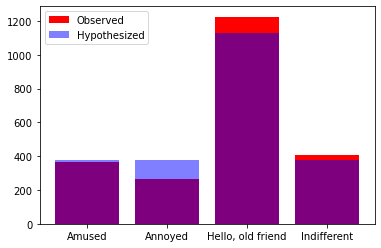

In [68]:
#Visualizing Counts
plt.bar(purple_link_counts["purple_link"],purple_link_counts["n"],color="red",label="Observed")
plt.bar(hypothesized["purple_link"],hypothesized["n"],alpha=0.5,color="blue",label="Hypothesized")

plt.legend()
plt.show()

In [69]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts["n"],f_exp=hypothesized["n"])

'''The p-value returned by the function is very small, much lower than the significance level of point-zero-one,     
 so we conclude that the sample distribution of proportions is different from the hypothesized distribution.'''

'The p-value returned by the function is very small, much lower than the significance level of point-zero-one,     \n so we conclude that the sample distribution of proportions is different from the hypothesized distribution.'

# Chap-4

## Assumptions in hypothesis testing
> Each hypothesis test we've seen so far makes assumptions about the data. It's only when these assumptions are met that it is appropriate to use that hypothesis test.

## Randomness

#### Assumption
> The samples are random subsets of large population
#### Consequences
- Sample is not representative of population

#### How to check this 
- Understand how your data was collected, 
- Speak to the data collector/ domain expert
----------------------------------------------------------------------------------------------------------------

## Independence of observation

#### Assumption
> Test assume that each observation (row) in the dataset is independent\
There are some special cases like paired t-tests where dependencies between two samples are allowed, but these change the calculations, so we need to understand where such dependencies occur
#### Consequences
- paired t-test, not accounting for dependencies results in an increased chance of false negative and false positive errors

#### How to check this 
- Not accounting for dependencies is a difficult problem to diagnose during analysis. Ideally, it needs to be discussed before data collection.

----------------------------------------------------------------------------------------------------------------

## Large Sample size

#### Assumption
> __Tests also assume that our sample is large enough to mitigate uncertainity so that the Central Limit Theorem applies, and the sample distribution can be assumed to be normally distributed.__\
Smaller sample incur uncertainity so that the Central Limit Theorem doesnot apply, and the sample distribution might not be normally distributed.
#### Consequences
- The increased uncertainty of a small sample means we get __wider confidence intervals__ on the parameter we are trying to estimate.
- If the Central Limit Theorem does not apply, the calculations on the sample, and any conclusions drawn from them, could be nonsense, which __increases the chance of false negative and false positive errors._

#### How to check this 
- How big our sample needs to be to be "big enough" __depends on the test__.

----------------------------------------------------------------------------------------------------------------

## Large Sample size: t-test

#### One sample
- At least 30 observations in the sample
    - __n1 >= 30__
    - n: sample size

#### Two samples
- At least 30 observations in the sample
    - __n >= 30 ,  n2 >= 30__
    - ni: sample size for each group i

#### Paired samples
- At least 30 pairs of observations across the sample
    - __number of rows in our data >= 30__

#### Annova
- At least 30 observations in the sample
    - __ni >= 30 for all values of i__ 
    
- That means we can't compensate for one minority group sample by making the majority group bigger
> Sometimes we can get away with less than 30 in each of these tests; the important thing is that the null distribution appears normal. This is often the case at around 30 and that's the reason for this somewhat arbitrary threshold.

----------------------------------------------------------------------------------------------------------------

## Large sample size: proportion tests

#### One sample
- For one sample proportion tests, the sample is considered big enough if it contains at least or greater than ten successes and ten failures.
    - Success : n * p_hat >= 10
    ----------------------------
    - Failure : 1- p_hat >= 10
- Notice that if the probability of success is close to zero or close to one, then we need a bigger sample

#### Two samples
- In the two sample case, we require greater than or equal to  ten successes and ten failures from each sample.
    - __Success : n1 * p_hat_1 >= 10 , n2 * p_hat_2 >= 10__
    ----------------------------------------------------------------
    - __Failure : n1 * (1- p_hat_1) >= 10   , n2 * (1- p_hat_2) >= 10__
     
----------------------------------------------------------------------------------------------------------------

## Large sample size: chi-square tests

- The chi-square test is slightly more forgiving and only requires greater than or equal to five successes and five failures in each group, rather than ten.
    - __Success : n(i) * p_hat(i) >= 5 for all values of (i)__
    ----------------------------
    - __Failure : n(i) * (1- p_hat(i)) >= 5 for all values of (i)__
- n(i) : sample size of group
- p_hat(i) : proportion of success in sample group i
-------------------------------------------------------------------------------------------------------------------

## Sanity check
> One more check we can perform is to calculate a bootstrap distribution and visualize it with a histogram. __If we don't see a bell-shaped normal curve, then one of the assumptions hasn't been met/valid__. In that case, we should __revisit the data collection process,__ and see if any of the three assumptions of __randomness, independence, and sample size__ do not hold.

In [70]:
# Practice Code
# Count the shipment_mode values
counts = stack_overflow["age_cat"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64
True


## Parametric tests
> The tests that we've seen so far are known as parametric tests. Tests like the __z-test, t-test, and ANOVA__ are all based on the assumption that the population is __normally distributed__. Parametric tests also require sample sizes that are "big enough" that the __Central Limit Theorem applies__

In [71]:
sample_data = pd.read_feather(r'C:\Users\navee\OneDrive\Desktop\Data_Camp\DataCamp_datasets\Hypothesis_Testing\repub_votes_potus_08_12.feather')
sample_data.tail(15)


,state,county,repub_percent_08,repub_percent_12
85,Utah,Sevier,79.855127,89.317140
86,Utah,Tooele,63.436581,74.077151
87,Virginia,Highland,59.845560,65.392781
88,Virginia,New Kent,63.907517,66.155391
89,Virginia,Harrisonburg,41.212947,42.102225
90,Washington,San Juan,28.088501,29.365679
91,West Virginia,Braxton,48.604178,56.723564
92,West Virginia,Clay,53.751914,65.438247
93,West Virginia,Morgan,60.857614,64.068711
94,West Virginia,Webster,45.338567,62.068966


In [91]:
# Smaller Republican votes data
repub_votes_small = sample_data.sample(n=5) 
repub_votes_small

,state,county,repub_percent_08,repub_percent_12
91,West Virginia,Braxton,48.604178,56.723564
1,Arkansas,Nevada,56.726272,58.983452
98,Wyoming,Weston,76.684241,83.983328
88,Virginia,New Kent,63.907517,66.155391
79,Texas,Real,76.044226,80.521173


In [92]:
## Results with pingouin.ttest() with small data
# - 5 pair is not enough to meet sample size condition for the paired t-test
# - Atleast 30 pair of observations requir across the 
alpha = 0.01
parametric = pg.ttest(x=repub_votes_small["repub_percent_08"], y=repub_votes_small["repub_percent_12"],paired=True,alternative="less")
parametric
# The small p-value indicates we should reject the null hypothesis, leading us to suspect that the 2008 election had
# a smaller percentage of Republican votes than the 2012 election.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.963803,4,less,0.008312,"[-inf, -2.26]",0.396624,9.768,0.183826


## Non-parametric tests
- what do we do if the assumptions for the hypothesis tests we've seen so far aren't met?
- non-parametric tests work better than the parametric alternative in situations where the __sample size is small__ or the __data cannot be assumed to be normally distributed__.

In [93]:
"""There are many different ways to perform tests without these parametric assumptions, we'll focus on those relating
to ranks.there orderings from smallest to largest are known as the ranks of the elements."""
from scipy.stats import rankdata
x=[4,9,6,8,13]
rankdata(x)

array([1., 4., 2., 3., 5.])

## Wilcoxon-signed rank test 
- Developed by Frack Wilcoxin in 1995
- One of the first parametric procedure
- The Wilcoxon signed-rank test works well when the assumptions of a paired t-test aren't met.

In [94]:
### Wilcoxon-signed rank test (Step 1)
'''The Wilcoxon-signed rank test requires us to calculate the absolute differences in the pairs of data and then 
rank them. First, we take the differences in the paired values.'''


repub_votes_small["diff"] = repub_votes_small["repub_percent_08"] - repub_votes_small["repub_percent_12"]

repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff
91,West Virginia,Braxton,48.604178,56.723564,-8.119385
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
98,Wyoming,Weston,76.684241,83.983328,-7.299087
88,Virginia,New Kent,63.907517,66.155391,-2.247874
79,Texas,Real,76.044226,80.521173,-4.476947


In [95]:
### Wilcoxon-signed rank test (Step 2)
'''Next, we take the absolute value of the differences, using the dot-abs method, and place them in the abs_diff column.'''

repub_votes_small["abs_diff"] = repub_votes_small["diff"].abs() # absolute values
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
91,West Virginia,Braxton,48.604178,56.723564,-8.119385,8.119385
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087
88,Virginia,New Kent,63.907517,66.155391,-2.247874,2.247874
79,Texas,Real,76.044226,80.521173,-4.476947,4.476947


In [96]:
### Wilcoxon-signed rank test (Step 3)
"""Then, we rank these absolute differences using the rankdata method from scipy-dot-stats."""
from scipy.stats import rankdata
repub_votes_small["rank-abs_diff"] = rankdata(repub_votes_small["abs_diff"]) 
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank-abs_diff
91,West Virginia,Braxton,48.604178,56.723564,-8.119385,8.119385,5.0
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179,2.0
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087,4.0
88,Virginia,New Kent,63.907517,66.155391,-2.247874,2.247874,1.0
79,Texas,Real,76.044226,80.521173,-4.476947,4.476947,3.0


In [97]:
### Wilcoxon-signed rank test (Step 4)
'''The last part of our calculation involves calculating a test statistic called W.  W uses the signs of the diff column
to split the ranks into two groups: one for rows with negative differences and one for positive differences.
T-minus is defined as the sum of the ranks with negative differences, and T-plus is the sum of the ranks with 
positive differences. For this example, all the differences are negative, so the T-minus value is the sum of the 
five ranks, and T-plus is zero. The test statistic W is the smaller of T-minus and T-plus, which in this case, is 
zero. We can calculate W, and its corresponding p-value, using a pingouin method instead of manual calculation.'''

# Incorporate the sum of the ranks for neagtive and positive differences
T_minus = 5+2+3+4+1
T_plus = 0
W = np.min([T_minus,T_plus])
W

0

In [98]:
#  Implementation with pingouin.wilcoxon()
alpha = 0.01
pg.wilcoxon(x=repub_votes_small["repub_percent_08"], y=repub_votes_small["repub_percent_12"],alternative="less")

# Result
# Fail to reject H0 since 0.03125 > 0.01

# This corresponds to a p-value of around three percent, which is over ten times larger than the p-value from the t-test, 
# so we should feel more confident with this result given the small sample size. The Wilcoxon test indicates that
# we do not have evidence that the 2008 Republican percentages are smaller than the 2012 percentages using this
# small sample of five rows.

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.64


## Non-parametric ANOVA and unpaired t-tests
- Here focusing on non-parametric alternatives to tests of independent numeric samples.
- We can avoid assumptions about normally distributed data by __performing hypothesis tests on the ranks of a numeric input.__
- The __Wilcoxon-Mann-Whitney test is also known as Mann Whitney U test__ is, very roughly speaking, a t-test on ranked data, but works on __unpaired data instead.__

In [101]:
## Wilcoxon-Mann-Whitney test setup

age_vs_comp = stack_overflow[["converted_comp","age_first_code_cut"]]

# To conduct a Wilcoxon-Mann-Whitney test with pingouin, we first need to convert our data from long to wide format.
age_vs_comp_wide = age_vs_comp.pivot(columns = "age_first_code_cut", values = "converted_comp" )
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [103]:
alpha = 0.01
pg.mwu(x=age_vs_comp_wide["child"],y=age_vs_comp_wide["adult"],alternative="greater")

#  alternative hypothesis, in this case, that those who code first as children have a higher income than
# those who code first as adults, which is a right-tailed test

## Decision Making
# Here, the p-value is shown as around ten to the negative nineteenth power, which is significantly smaller 
# than the significance level.

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


In [105]:
## Kruskal-Wallis test
'''In the same way that ANOVA extends t-tests to more than two groups, the Kruskal-Wallis test extends the 
Wilcoxon-Mann-Whitney test to more than two groups. That is, the Kruskal-Wallis test is a non-parametric version 
of ANOVA'''

# Here, test to investigate if there is a difference in converted_comp between job satisfaction groups.
pg.kruskal(data=stack_overflow,dv="converted_comp",between="job_sat")

# kruskal method works on long data so no need to pivot. 
# Again, the p-value here is very small and smaller than our significance level. This provides evidence that
# at least one of the mean compensation totals is different than the others across these five job satisfaction groups.

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


In [109]:
# Practice Code

# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms", "late"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pg.mwu(x=weight_vs_late_wide['No'],
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results
print(wmw_test)

"""They tried to make me use parameters, but I said "No, no, no". The small p-value here leads us to suspect 
that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney
test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test."""

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


In [113]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pg.kruskal(data=late_shipments,dv="weight_kilograms",between="shipment_mode")



# Print the results
print(kw_test)

"""The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups
of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an
ANOVA, which tests for a difference in means across multiple groups"""

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


'The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups\nof shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an\nANOVA, which tests for a difference in means across multiple groups'